In [1]:
import confirm.outlaw.nb_util as nb_util

nb_util.setup_nb()

import confirm.imprint as ip
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import shutil

shutil.copy2("lewis1dslice.db", "lewis1dslice_inspect.db")
shutil.copy2("lewis1dslice.db.wal", "lewis1dslice_inspect.db.wal")
db = ip.db.DuckDB.connect("lewis1dslice_inspect.db")

In [3]:
df = db.get_all()

In [4]:
def verify_adagrid(df):
    inactive_ids = df.loc[~df["active"], "id"]
    assert inactive_ids.unique().shape == inactive_ids.shape

    parents = df["parent_id"].unique()
    parents_that_dont_exist = np.setdiff1d(parents, inactive_ids)
    inactive_tiles_with_no_children = np.setdiff1d(inactive_ids, parents)
    print(parents_that_dont_exist)
    # assert parents_that_dont_exist.shape[0] == 1
    # assert parents_that_dont_exist[0] == 0
    assert inactive_tiles_with_no_children.shape[0] == 0

In [5]:
verify_adagrid(df)

[0]


In [6]:
g = ip.Grid(df).active()

In [7]:
np.sum(g.df["total_cost"] > 0.002), g.df.shape[0]

(2269446, 2272657)

In [8]:
np.sum((g.df["total_cost"] > 0.003) & (g.df["grid_cost"] > g.df["sim_cost"]))

0

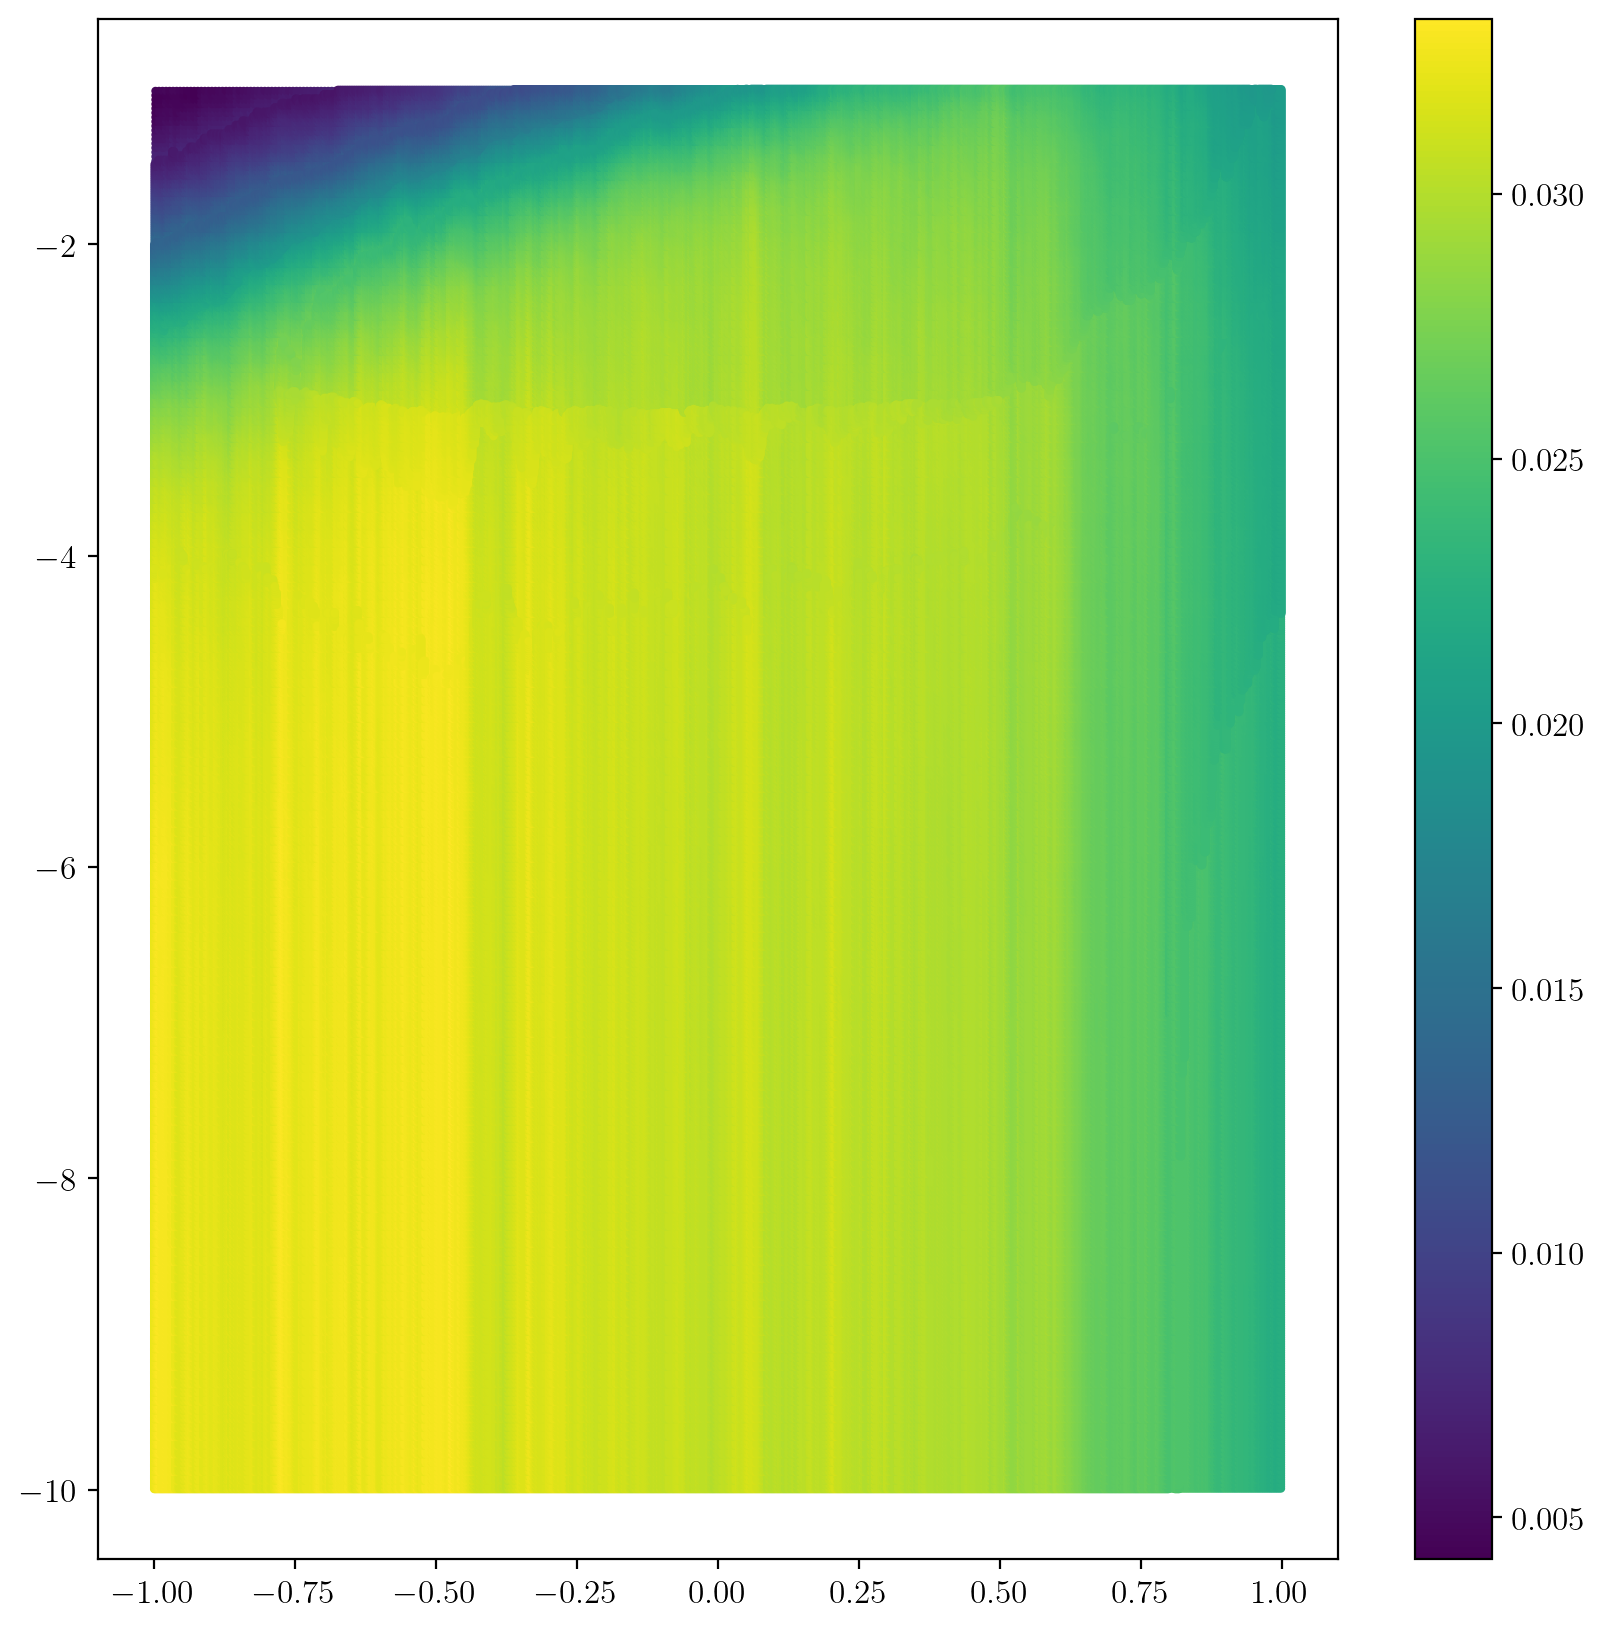

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(g.df["theta0"], g.df["theta1"], c=g.df["tie_bound"], cmap="viridis", s=4)
plt.colorbar()
plt.show()

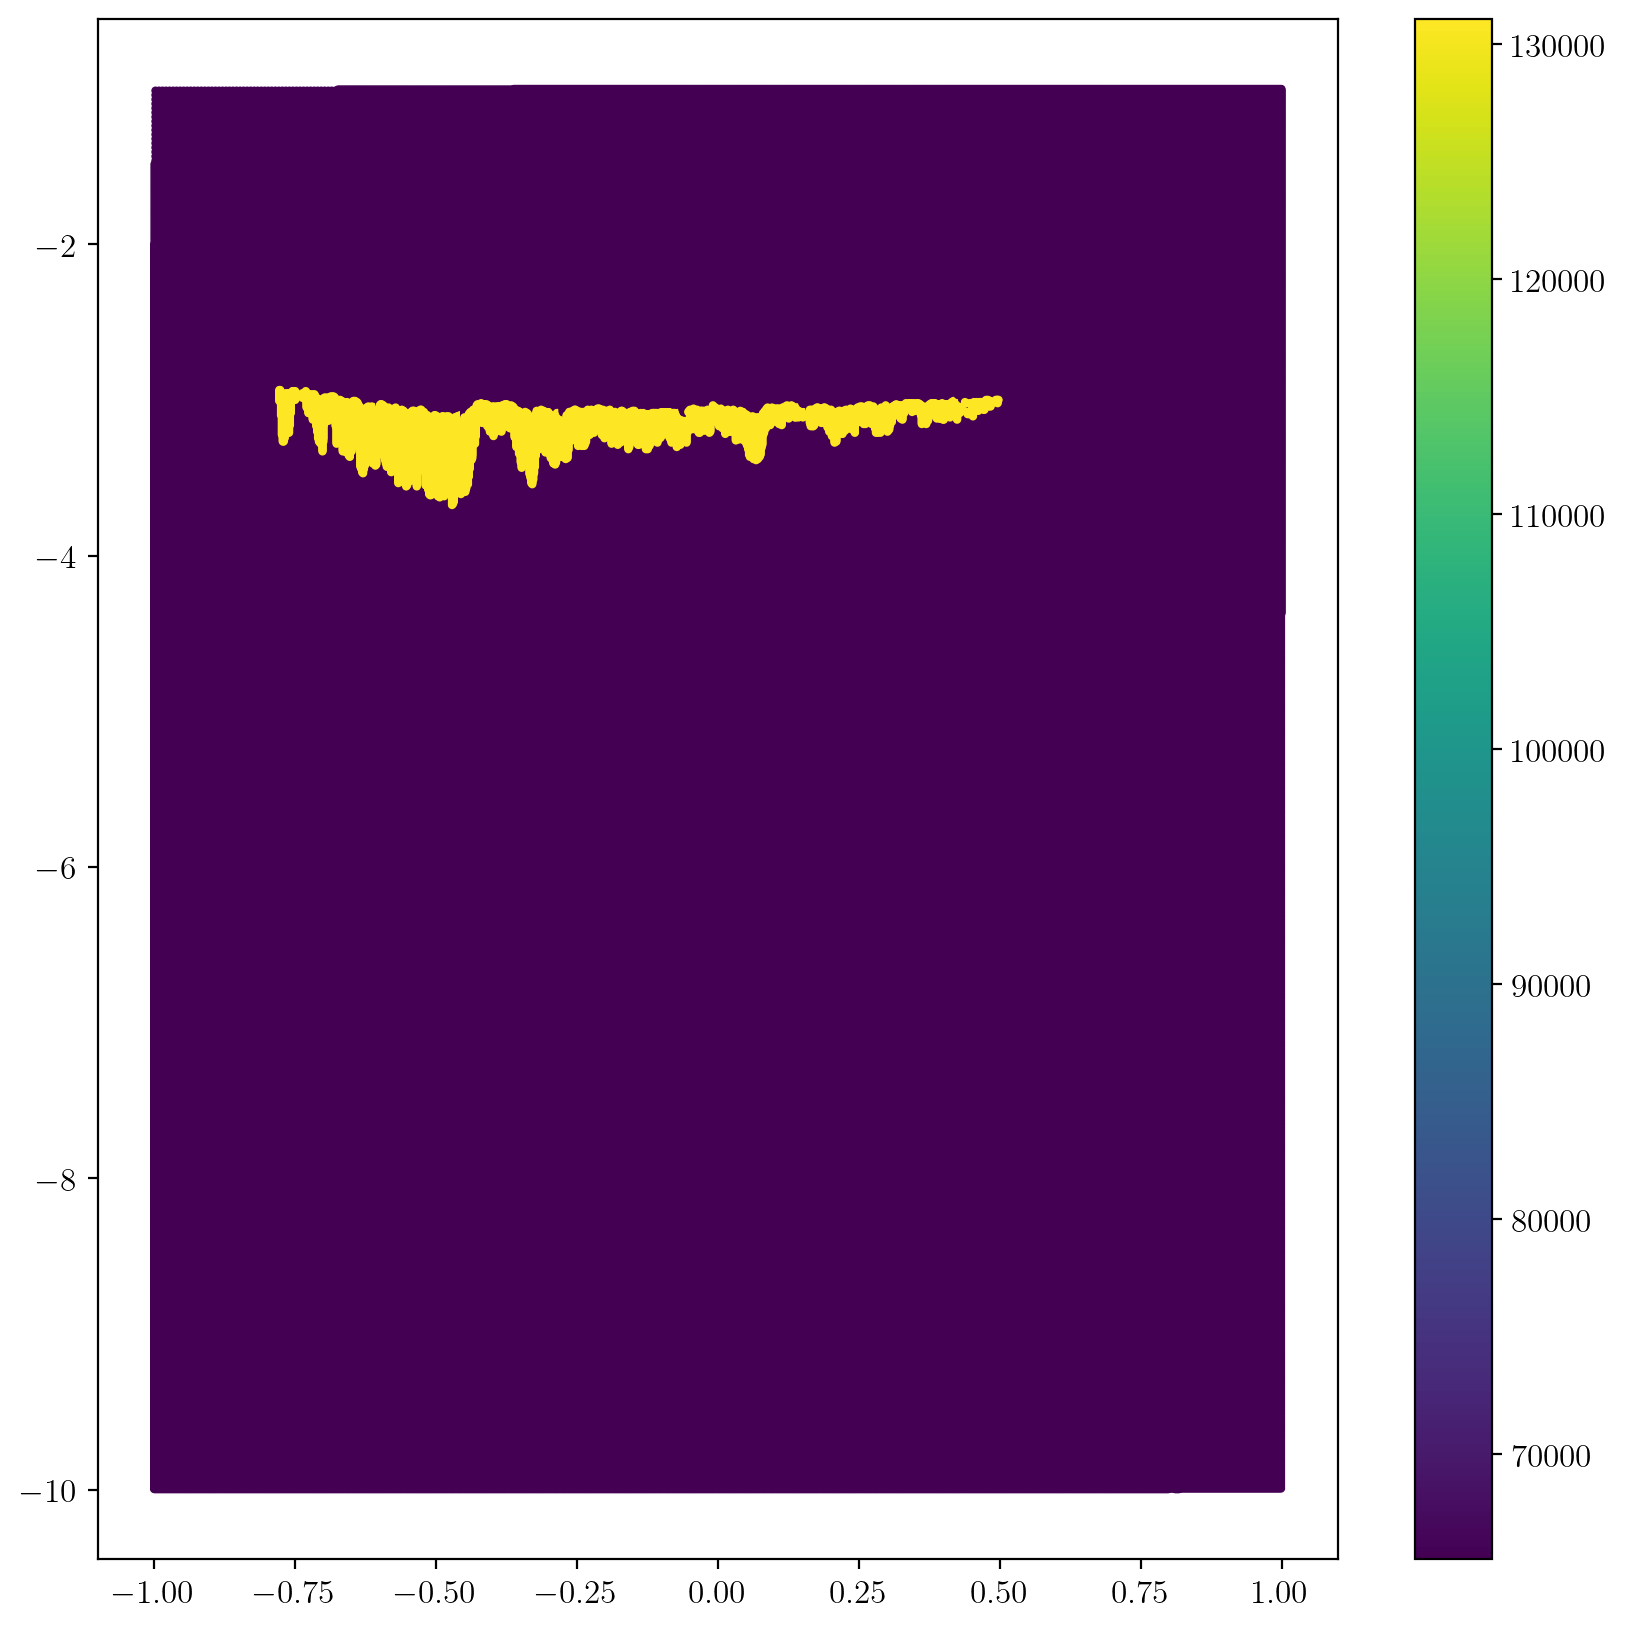

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(g.df["theta0"], g.df["theta1"], c=g.df["K"], cmap="viridis", s=4)
plt.colorbar()
plt.show()

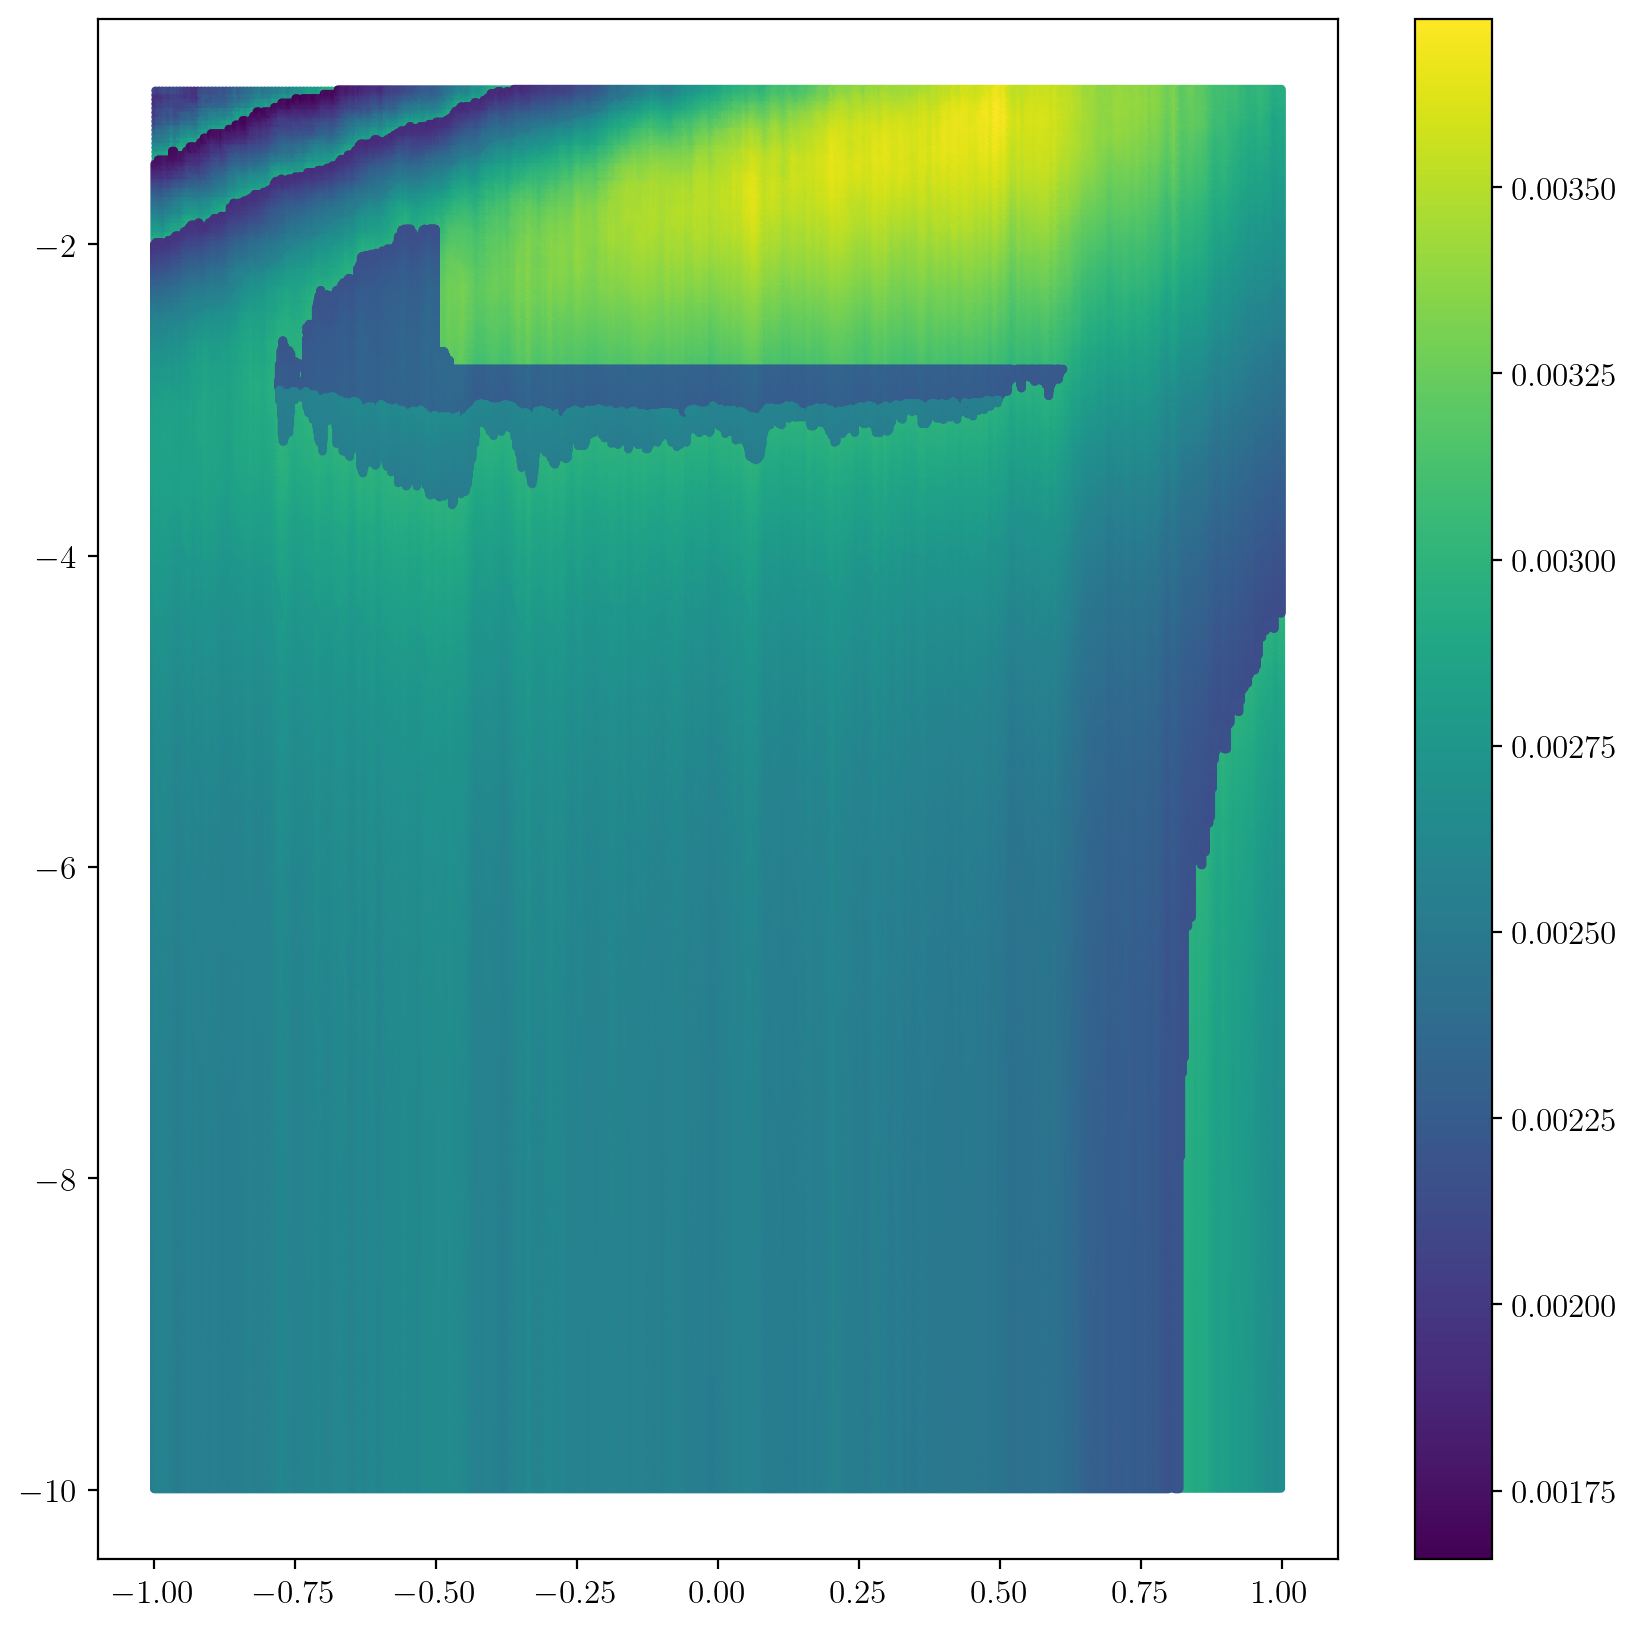

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(
    g.df["theta0"],
    g.df["theta1"],
    c=g.df["total_cost"],
    cmap="viridis",
    s=4,
)
plt.colorbar()
plt.show()

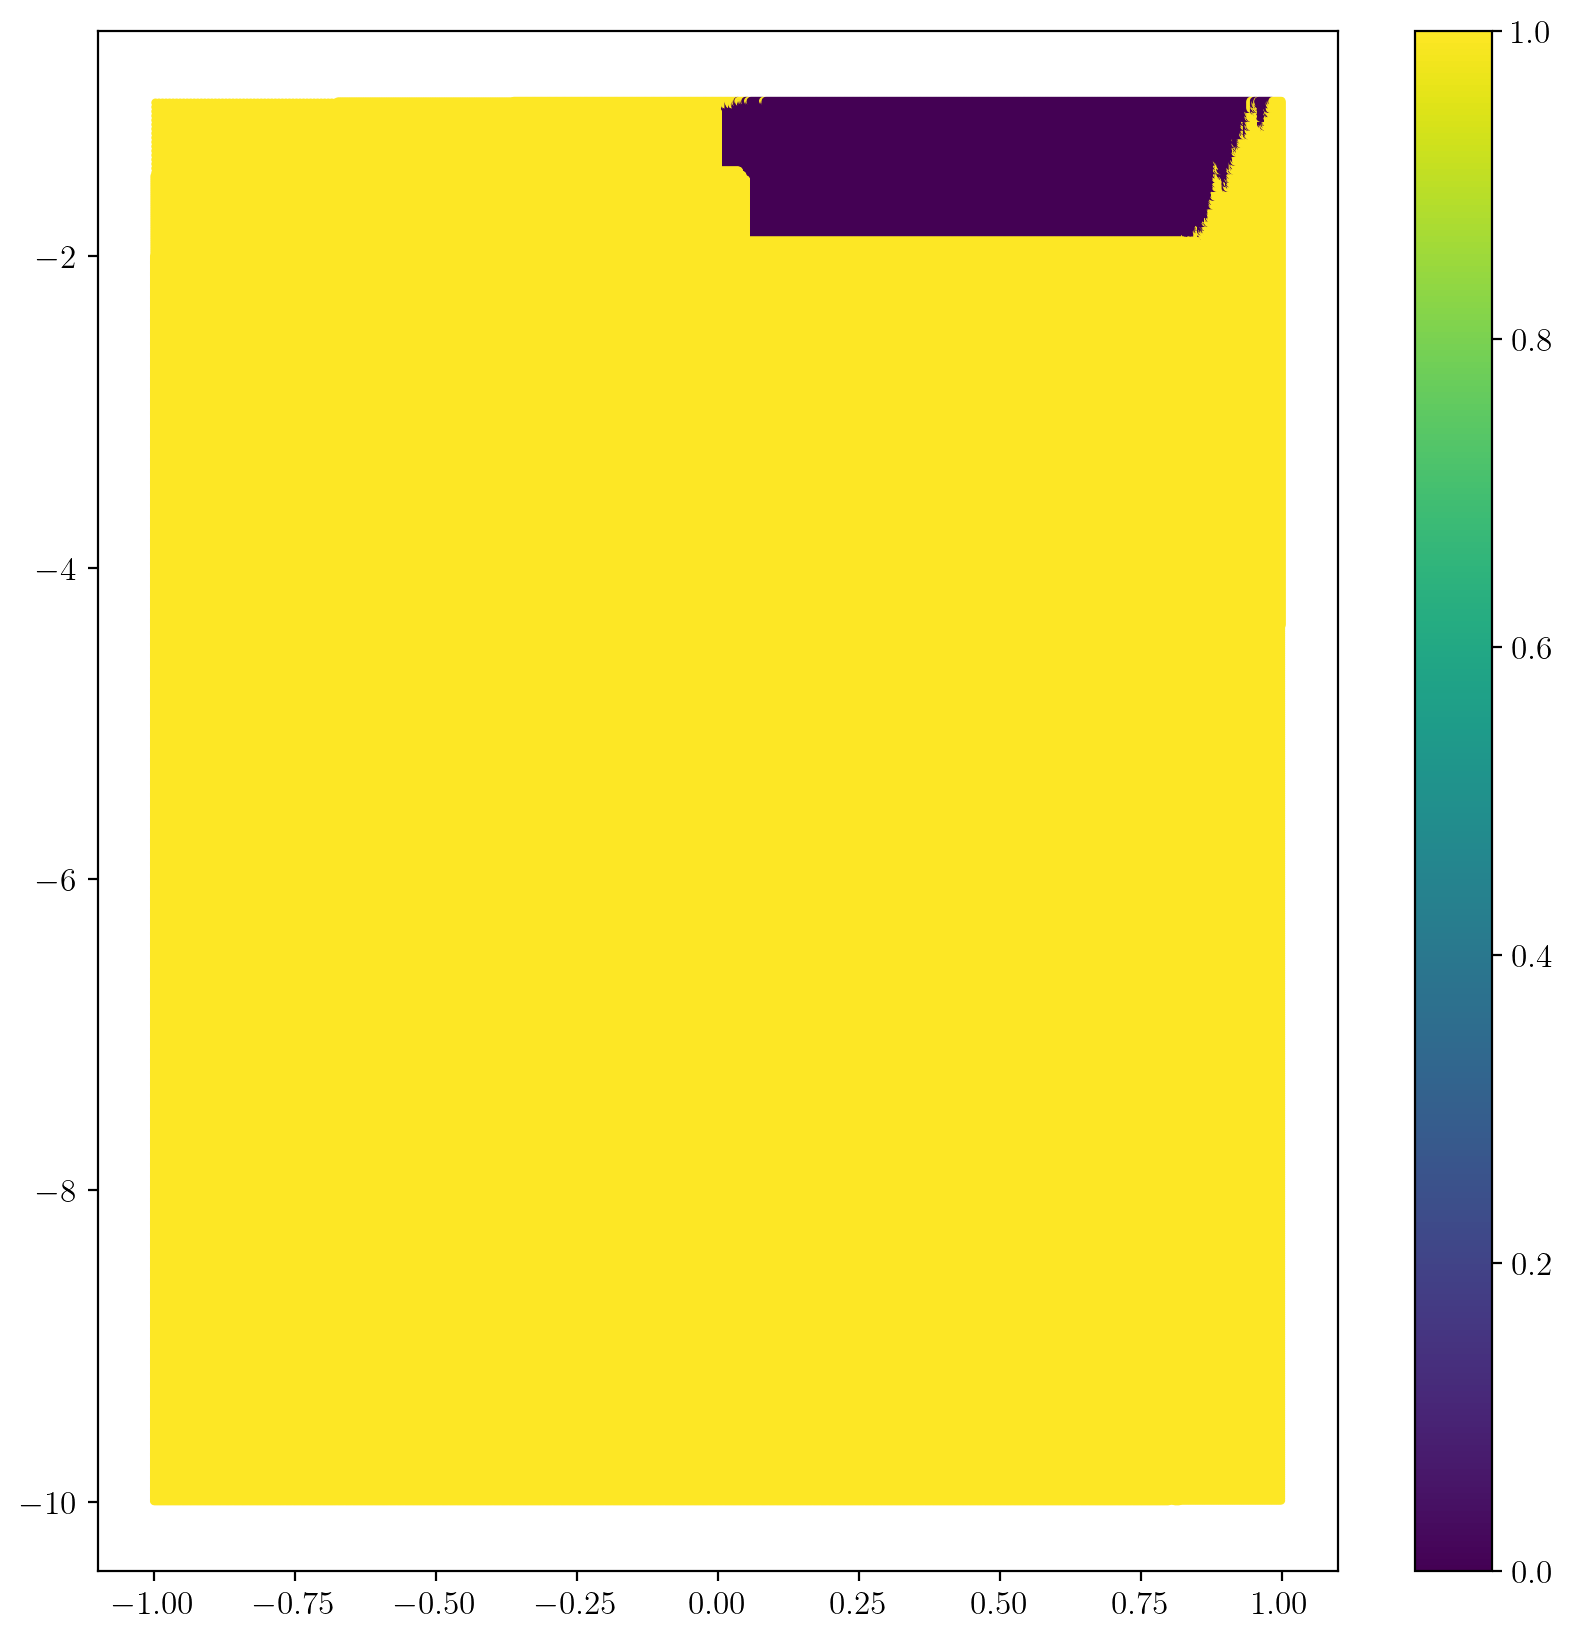

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(
    g.df["theta0"],
    g.df["theta1"],
    c=g.df["total_cost"] < 0.003,
    cmap="viridis",
    s=4,
)
plt.colorbar()
plt.show()

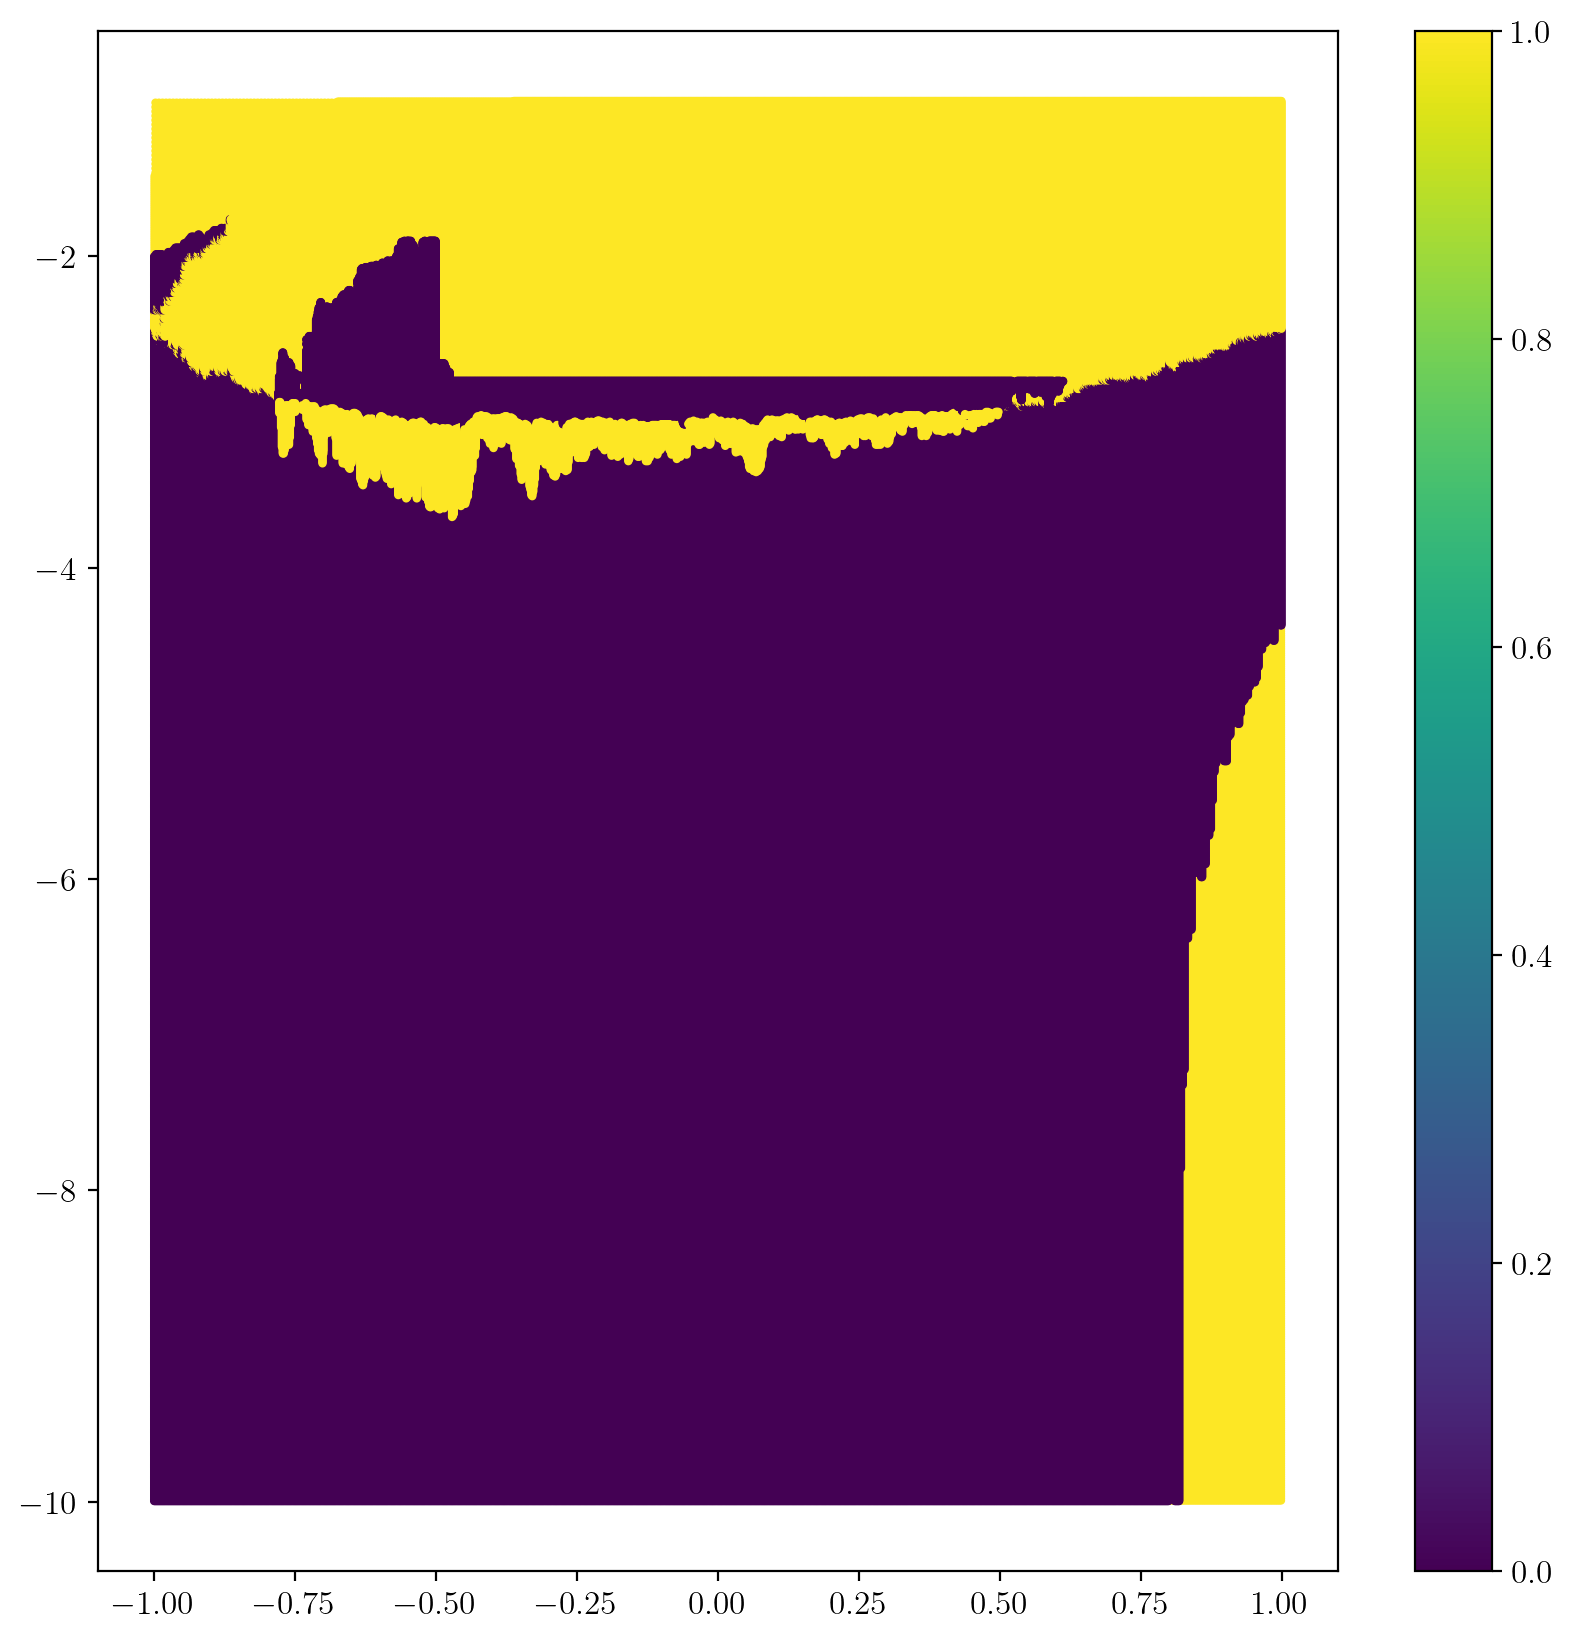

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(
    g.df["theta0"],
    g.df["theta1"],
    c=g.df["grid_cost"] > g.df["sim_cost"],
    cmap="viridis",
    s=4,
)
plt.colorbar()
plt.show()

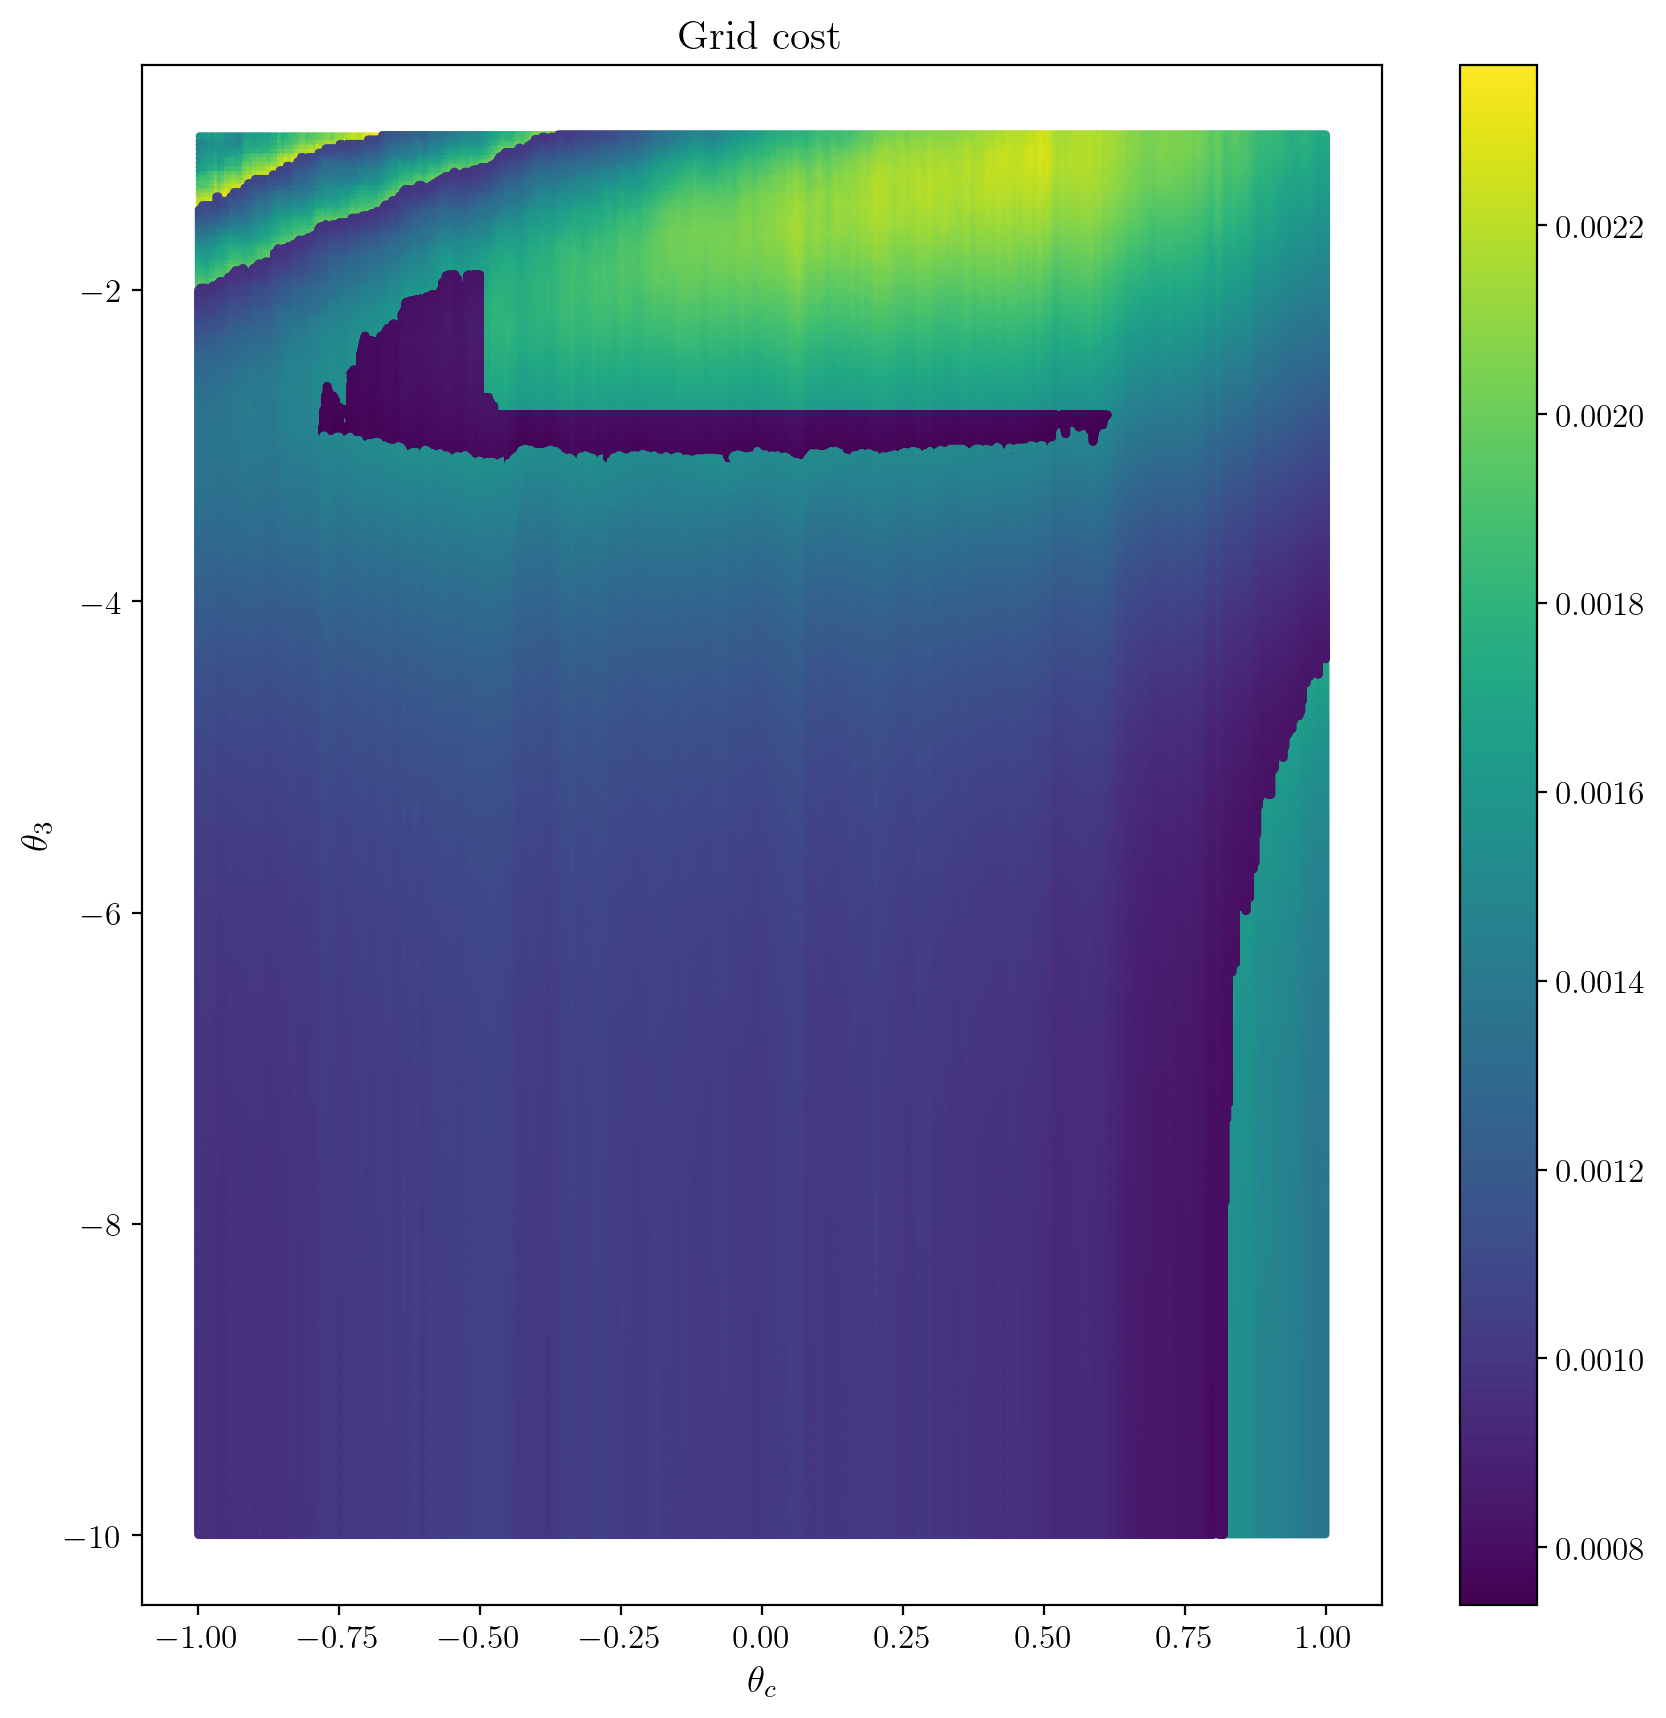

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(
    g.df["theta0"],
    g.df["theta1"],
    c=g.df["grid_cost"],
    cmap="viridis",
    s=4,
)
plt.xlabel("$\\theta_c$")
plt.ylabel("$\\theta_3$")
plt.colorbar()
plt.title("Grid cost")
plt.show()